In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/데이터/2020_2022_traffic_data.xlsx")

In [4]:
df

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20200101,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,...,1472.0,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0
1,20200102,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,...,1792.0,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0
2,20200103,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,...,2004.0,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0
3,20200104,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,...,1837.0,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0
4,20200105,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,...,1634.0,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239343,20220527,금,신월여의지하도로,F-10,유출,서울교->신월IC,711.0,409.0,135.0,58.0,...,1523.0,1734.0,2013.0,1894.0,1724.0,2031.0,1743.0,1411.0,1378.0,1264.0
239344,20220528,토,신월여의지하도로,F-10,유출,서울교->신월IC,694.0,454.0,313.0,231.0,...,1449.0,1969.0,2040.0,2061.0,2022.0,1642.0,1484.0,1412.0,1148.0,988.0
239345,20220529,일,신월여의지하도로,F-10,유출,서울교->신월IC,595.0,443.0,302.0,143.0,...,1405.0,1676.0,1591.0,1536.0,1426.0,1228.0,1233.0,1235.0,1172.0,627.0
239346,20220530,월,신월여의지하도로,F-10,유출,서울교->신월IC,336.0,200.0,116.0,72.0,...,1462.0,1575.0,1947.0,1691.0,1388.0,1875.0,1467.0,1270.0,1083.0,780.0


In [5]:
dates=sorted(list(set(df['일자'])))

In [6]:
data = (df['지점명'] == '강남대로(신사역)')

In [7]:
is_road = df['지점명'] == '강남대로(신사역)'

road = df[is_road]

road

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
7626,20200101,수,강남대로(신사역),D-43,유입,논현역->신사역,1790.0,1547.0,1418.0,1236.0,...,1379.0,1334.0,1374.0,1435.0,1303.0,1200.0,1273.0,1249.0,1160.0,1050.0
7627,20200102,목,강남대로(신사역),D-43,유입,논현역->신사역,871.0,690.0,492.0,435.0,...,1933.0,1858.0,1940.0,2149.0,2341.0,2296.0,2002.0,2026.0,1991.0,1715.0
7628,20200103,금,강남대로(신사역),D-43,유입,논현역->신사역,1477.0,1247.0,968.0,843.0,...,1922.0,1668.0,1799.0,2175.0,2243.0,2469.0,2132.0,2128.0,2197.0,1988.0
7629,20200104,토,강남대로(신사역),D-43,유입,논현역->신사역,1872.0,1547.0,1521.0,1268.0,...,1651.0,1660.0,1648.0,1853.0,1786.0,1632.0,1689.0,1714.0,1752.0,1825.0
7630,20200105,일,강남대로(신사역),D-43,유입,논현역->신사역,1638.0,1496.0,1272.0,1074.0,...,1636.0,1627.0,1611.0,1585.0,1587.0,1508.0,1451.0,1401.0,1351.0,1213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238537,20220527,금,강남대로(신사역),D-43,유출,신사역->논현역,903.0,726.0,676.0,608.0,...,1825.0,1797.0,1856.0,1733.0,1762.0,1663.0,1733.0,1673.0,1541.0,1322.0
238538,20220528,토,강남대로(신사역),D-43,유출,신사역->논현역,1109.0,844.0,712.0,647.0,...,1741.0,1633.0,1643.0,1796.0,1725.0,1565.0,1612.0,1580.0,1470.0,1286.0
238539,20220529,일,강남대로(신사역),D-43,유출,신사역->논현역,1028.0,832.0,675.0,584.0,...,1736.0,1675.0,1654.0,1564.0,1579.0,1306.0,1538.0,1313.0,1107.0,939.0
238540,20220530,월,강남대로(신사역),D-43,유출,신사역->논현역,733.0,546.0,465.0,375.0,...,1822.0,1830.0,1859.0,1928.0,1805.0,1569.0,1412.0,1428.0,1245.0,1052.0


In [8]:
is_road = road['방향'] == '유입'

road = road[is_road]

road

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
7626,20200101,수,강남대로(신사역),D-43,유입,논현역->신사역,1790.0,1547.0,1418.0,1236.0,...,1379.0,1334.0,1374.0,1435.0,1303.0,1200.0,1273.0,1249.0,1160.0,1050.0
7627,20200102,목,강남대로(신사역),D-43,유입,논현역->신사역,871.0,690.0,492.0,435.0,...,1933.0,1858.0,1940.0,2149.0,2341.0,2296.0,2002.0,2026.0,1991.0,1715.0
7628,20200103,금,강남대로(신사역),D-43,유입,논현역->신사역,1477.0,1247.0,968.0,843.0,...,1922.0,1668.0,1799.0,2175.0,2243.0,2469.0,2132.0,2128.0,2197.0,1988.0
7629,20200104,토,강남대로(신사역),D-43,유입,논현역->신사역,1872.0,1547.0,1521.0,1268.0,...,1651.0,1660.0,1648.0,1853.0,1786.0,1632.0,1689.0,1714.0,1752.0,1825.0
7630,20200105,일,강남대로(신사역),D-43,유입,논현역->신사역,1638.0,1496.0,1272.0,1074.0,...,1636.0,1627.0,1611.0,1585.0,1587.0,1508.0,1451.0,1401.0,1351.0,1213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238506,20220527,금,강남대로(신사역),D-43,유입,논현역->신사역,1205.0,1046.0,943.0,858.0,...,1747.0,1718.0,1906.0,2117.0,2134.0,2021.0,1939.0,2093.0,1947.0,1621.0
238507,20220528,토,강남대로(신사역),D-43,유입,논현역->신사역,1280.0,1223.0,1110.0,1055.0,...,1471.0,1580.0,1440.0,1614.0,1618.0,1455.0,1551.0,1555.0,1554.0,1464.0
238508,20220529,일,강남대로(신사역),D-43,유입,논현역->신사역,1286.0,1140.0,1048.0,905.0,...,1523.0,1465.0,1507.0,1540.0,1493.0,1325.0,1354.0,1281.0,1302.0,1115.0
238509,20220530,월,강남대로(신사역),D-43,유입,논현역->신사역,905.0,826.0,625.0,540.0,...,1780.0,1817.0,1985.0,2158.0,2157.0,1991.0,1905.0,1921.0,1739.0,1376.0


In [9]:
# df = (df['지점명'] == '강남대로(신사역)')

In [10]:
from collections import deque
import pandas as pd
from tqdm import tqdm

전체

In [11]:
for i in tqdm(range(len(dates))):
    #날짜 하루
    date=dates[i]
    #각 날짜에 해당하는 데이터
    date_df = road[road['일자']==date]
    date_df = date_df.drop(['지점번호', '구분', '요일'], axis=1)
    date_df["지점명"]=date_df['지점명']+'-'+date_df['방향']
    date_df = date_df.drop(['방향'], axis=1)

    times=date_df.iloc[:,2:]
    col=deque(list(times.columns))

    #바꾸려는 컬럼 리스트 만들기
    for k in range(len(col)):
        col[k]=str(date)+'-'+col[k]
        #col[k]=col[k].replace('시','')

    #원래 데이터의 컬럼 0시 -> 20220101-0 으로 바꾸기
    for j in range(2,len(col)+2):
        date_df.rename(columns={date_df.columns[j]:col[j-2]},inplace=True)

    #전치하고 0시에 일자반영했으니까 '일자' 지우기
    date_df=date_df.T.drop('일자')

    #지점명은 이제 컬럼으로 바꾸었으니 지점명 행 필요없어서 제외하고 뽑기
    last_df = date_df.drop(['지점명'])

    last_df.columns = ['강남대로(신사역)-유입']

     #일자별 데이터 합치기
    del_df=last_df.iloc[:1,:] #나중에 지워야할 행
    if i==0:
      final_df=pd.concat([del_df,last_df])
    else:
      final_df=pd.concat([final_df,last_df])

100%|██████████| 882/882 [00:07<00:00, 123.45it/s]


In [12]:
final_df

,강남대로(신사역)-유입
20200101-0시,1790.0
20200101-0시,1790.0
20200101-1시,1547.0
20200101-2시,1418.0
20200101-3시,1236.0
...,...
20220531-19시,1973.0
20220531-20시,1970.0
20220531-21시,2041.0
20220531-22시,1960.0


In [13]:
final_df = final_df.iloc[1:, :]
final_df

,강남대로(신사역)-유입
20200101-0시,1790.0
20200101-1시,1547.0
20200101-2시,1418.0
20200101-3시,1236.0
20200101-4시,1147.0
...,...
20220531-19시,1973.0
20220531-20시,1970.0
20220531-21시,2041.0
20220531-22시,1960.0


파일 저장 (null 값 처리 전, 정규화 전)

저장

In [14]:
import pandas as pd

# 엑셀로 저장하기
final_df.to_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_use_2020_2022_traffic_data.xlsx')

In [15]:
use_df = pd.read_excel("/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_use_2020_2022_traffic_data.xlsx")

In [16]:
use_df

,Unnamed: 0,강남대로(신사역)-유입
0,20200101-0시,1790.0
1,20200101-1시,1547.0
2,20200101-2시,1418.0
3,20200101-3시,1236.0
4,20200101-4시,1147.0
...,...,...
21163,20220531-19시,1973.0
21164,20220531-20시,1970.0
21165,20220531-21시,2041.0
21166,20220531-22시,1960.0


In [17]:
use_df.rename(columns={'Unnamed: 0' : 'Date-Time'}, inplace=True)
use_df

,Date-Time,강남대로(신사역)-유입
0,20200101-0시,1790.0
1,20200101-1시,1547.0
2,20200101-2시,1418.0
3,20200101-3시,1236.0
4,20200101-4시,1147.0
...,...,...
21163,20220531-19시,1973.0
21164,20220531-20시,1970.0
21165,20220531-21시,2041.0
21166,20220531-22시,1960.0


In [18]:
import pandas as pd

# 엑셀로 저장하기
use_df.to_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_use_2020_2022_traffic_data.xlsx', index = False)

In [19]:
use_df = pd.read_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_use_2020_2022_traffic_data.xlsx')

In [20]:
use_df

,Date-Time,강남대로(신사역)-유입
0,20200101-0시,1790.0
1,20200101-1시,1547.0
2,20200101-2시,1418.0
3,20200101-3시,1236.0
4,20200101-4시,1147.0
...,...,...
21163,20220531-19시,1973.0
21164,20220531-20시,1970.0
21165,20220531-21시,2041.0
21166,20220531-22시,1960.0


# 여기 부분 요일 24개씩 채워서 하나의 열 추가하기

In [21]:
week=['수', '목', '금', '토', '일', '월', '화']
weekday=[]

while True:

  for i in week:
    for k in range(24):
      weekday.append(i)

  if len(weekday)==21168:
    break

In [22]:
len(weekday)

21168

In [23]:
week_df = pd.DataFrame(weekday)

In [24]:
week_df

,0
0,수
1,수
2,수
3,수
4,수
...,...
21163,화
21164,화
21165,화
21166,화


In [25]:
week_df.rename(columns={0 : 'Day'}, inplace=True)
week_df

,Day
0,수
1,수
2,수
3,수
4,수
...,...
21163,화
21164,화
21165,화
21166,화


In [26]:
dff = pd.concat([use_df, week_df], axis=1)

In [27]:
dff

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


In [28]:
import pandas as pd

# 엑셀로 저장하기
dff.to_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_dff_2020_2022_traffic_data.xlsx', index = False)

In [72]:
dff = pd.read_excel("/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_dff_2020_2022_traffic_data.xlsx")

In [73]:
dff

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


# null 값 처리 & 정규화

In [74]:
dff

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


In [75]:
dff.isnull().sum()

Date-Time         0
강남대로(신사역)-유입    351
Day               0
dtype: int64

In [110]:
# dff.groupby(dff['Day']=='수', as_index=False).mean()

In [111]:
# dff.groupby(dff['Day']=='목', as_index=False).mean()

In [76]:
condition1 = (dff.Day == '수')
dff[condition1]

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21019,20220525-19시,1882.0,수
21020,20220525-20시,1809.0,수
21021,20220525-21시,1965.0,수
21022,20220525-22시,1817.0,수


In [77]:
Wed = dff[condition1]

In [78]:
Wed.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1405.265072
dtype: float64

In [79]:
condition2 = (dff.Day == '목')
dff[condition2]

,Date-Time,강남대로(신사역)-유입,Day
24,20200102-0시,871.0,목
25,20200102-1시,690.0,목
26,20200102-2시,492.0,목
27,20200102-3시,435.0,목
28,20200102-4시,447.0,목
...,...,...,...
21043,20220526-19시,2056.0,목
21044,20220526-20시,2076.0,목
21045,20220526-21시,2056.0,목
21046,20220526-22시,1962.0,목


In [80]:
Thurs = dff[condition2]

In [81]:
Thurs.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1428.246806
dtype: float64

In [82]:
condition3 = (dff.Day == '금')
dff[condition3]

,Date-Time,강남대로(신사역)-유입,Day
48,20200103-0시,1477.0,금
49,20200103-1시,1247.0,금
50,20200103-2시,968.0,금
51,20200103-3시,843.0,금
52,20200103-4시,724.0,금
...,...,...,...
21067,20220527-19시,2021.0,금
21068,20220527-20시,1939.0,금
21069,20220527-21시,2093.0,금
21070,20220527-22시,1947.0,금


In [83]:
Fri = dff[condition3] 

In [84]:
Fri.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1435.055556
dtype: float64

In [85]:
condition4 = (dff.Day == '토')
dff[condition4]

,Date-Time,강남대로(신사역)-유입,Day
72,20200104-0시,1872.0,토
73,20200104-1시,1547.0,토
74,20200104-2시,1521.0,토
75,20200104-3시,1268.0,토
76,20200104-4시,1086.0,토
...,...,...,...
21091,20220528-19시,1455.0,토
21092,20220528-20시,1551.0,토
21093,20220528-21시,1555.0,토
21094,20220528-22시,1554.0,토


In [86]:
Sat = dff[condition4] 

In [87]:
Sat.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1284.398055
dtype: float64

In [88]:
condition5 = (dff.Day == '일')
dff[condition5]

,Date-Time,강남대로(신사역)-유입,Day
96,20200105-0시,1638.0,일
97,20200105-1시,1496.0,일
98,20200105-2시,1272.0,일
99,20200105-3시,1074.0,일
100,20200105-4시,963.0,일
...,...,...,...
21115,20220529-19시,1325.0,일
21116,20220529-20시,1354.0,일
21117,20220529-21시,1281.0,일
21118,20220529-22시,1302.0,일


In [89]:
Sun = dff[condition5]

In [90]:
Sun.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1138.075427
dtype: float64

In [91]:
condition6 = (dff.Day == '월')
dff[condition6]

,Date-Time,강남대로(신사역)-유입,Day
120,20200106-0시,1063.0,월
121,20200106-1시,823.0,월
122,20200106-2시,690.0,월
123,20200106-3시,632.0,월
124,20200106-4시,608.0,월
...,...,...,...
21139,20220530-19시,1991.0,월
21140,20220530-20시,1905.0,월
21141,20220530-21시,1921.0,월
21142,20220530-22시,1739.0,월


In [92]:
Mon = dff[condition6]

In [93]:
Mon.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1363.224798
dtype: float64

In [94]:
condition7 = (dff.Day == '화')
dff[condition7]

,Date-Time,강남대로(신사역)-유입,Day
144,20200107-0시,1345.0,화
145,20200107-1시,1081.0,화
146,20200107-2시,881.0,화
147,20200107-3시,812.0,화
148,20200107-4시,748.0,화
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


In [95]:
Tues = dff[condition7]

In [96]:
Tues.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


강남대로(신사역)-유입    1410.936888
dtype: float64

요일별 평균

In [97]:
a = 1405
b = 1428
c = 1435
d = 1284
e = 1138
f = 1363
g = 1410

In [98]:
len(dff)

21168

In [99]:
dff

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


In [100]:
dff[condition1]=dff[condition1].fillna(a)

In [101]:
dff.isnull().sum()

Date-Time         0
강남대로(신사역)-유입    296
Day               0
dtype: int64

In [102]:
dff[condition1] = dff[condition1].fillna(a)
dff[condition2] = dff[condition2].fillna(b)
dff[condition3] = dff[condition3].fillna(c)
dff[condition4] = dff[condition4].fillna(d)
dff[condition5] = dff[condition5].fillna(e)
dff[condition6] = dff[condition6].fillna(f)
dff[condition7] = dff[condition7].fillna(g)

In [103]:
dff.isnull().sum()

Date-Time       0
강남대로(신사역)-유입    0
Day             0
dtype: int64

In [104]:
dff

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790.0,수
1,20200101-1시,1547.0,수
2,20200101-2시,1418.0,수
3,20200101-3시,1236.0,수
4,20200101-4시,1147.0,수
...,...,...,...
21163,20220531-19시,1973.0,화
21164,20220531-20시,1970.0,화
21165,20220531-21시,2041.0,화
21166,20220531-22시,1960.0,화


In [105]:
import pandas as pd

# 엑셀로 저장하기
dff.to_excel("/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_clean_2020_2022_traffic_data.xlsx", index = False)

In [6]:
clean_df = pd.read_excel("/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_clean_2020_2022_traffic_data.xlsx")

In [7]:
clean_df

,Date-Time,강남대로(신사역)-유입,Day
0,20200101-0시,1790,수
1,20200101-1시,1547,수
2,20200101-2시,1418,수
3,20200101-3시,1236,수
4,20200101-4시,1147,수
...,...,...,...
21163,20220531-19시,1973,화
21164,20220531-20시,1970,화
21165,20220531-21시,2041,화
21166,20220531-22시,1960,화


정규화

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = list(clean_df.columns[1:2])
# 스케일 후 columns
scaled = scaler.fit_transform(clean_df[scale_cols])
scaled

array([[0.58016353],
       [0.49377888],
       [0.44792037],
       ...,
       [0.66939211],
       [0.64059723],
       [0.49555635]])

In [9]:
scaled.shape

(21168, 1)

요일은 명목변수로

In [10]:
import pandas as pd
from patsy import dmatrix

In [12]:
dmatrix("Day + 0", clean_df)

DesignMatrix with shape (21168, 7)
  Day[금]  Day[목]  Day[수]  Day[월]  Day[일]  Day[토]  Day[화]
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0       0
       0       0       1       0       0       0     

In [14]:
day = dmatrix("Day + 0", clean_df)

In [15]:
day_df = pd.DataFrame(day)

In [16]:
day_df

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21163,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21164,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21165,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21166,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
day_df = day_df.rename(columns={0 : '금'})
day_df = day_df.rename(columns={1 : '목'})
day_df = day_df.rename(columns={2 : '수'})
day_df = day_df.rename(columns={3 : '월'})
day_df = day_df.rename(columns={4 : '일'})
day_df = day_df.rename(columns={5 : '토'})
day_df = day_df.rename(columns={6 : '화'})
day_df

,금,목,수,월,일,토,화
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21163,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21164,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21165,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21166,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
day_df = day_df.reindex(columns=['일', '월', '화', '수', '목', '금', '토'])
day_df

,일,월,화,수,목,금,토
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21163,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21164,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21166,0.0,0.0,1.0,0.0,0.0,0.0,0.0


요일을 지우고 day_df를 붙여보자

In [19]:
clean_df = clean_df.drop('Day', axis=1)
clean_df

,Date-Time,강남대로(신사역)-유입
0,20200101-0시,1790
1,20200101-1시,1547
2,20200101-2시,1418
3,20200101-3시,1236
4,20200101-4시,1147
...,...,...
21163,20220531-19시,1973
21164,20220531-20시,1970
21165,20220531-21시,2041
21166,20220531-22시,1960


In [20]:
pd.concat([clean_df, day_df], axis=1)

,Date-Time,강남대로(신사역)-유입,일,월,화,수,목,금,토
0,20200101-0시,1790,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20200101-1시,1547,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20200101-2시,1418,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20200101-3시,1236,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20200101-4시,1147,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21163,20220531-19시,1973,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21164,20220531-20시,1970,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21165,20220531-21시,2041,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21166,20220531-22시,1960,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
last_df1 = pd.DataFrame(clean_df, columns = ['Date-Time'])

In [24]:
last_df1

,Date-Time
0,20200101-0시
1,20200101-1시
2,20200101-2시
3,20200101-3시
4,20200101-4시
...,...
21163,20220531-19시
21164,20220531-20시
21165,20220531-21시
21166,20220531-22시


In [25]:
last_df2 = pd.DataFrame(scaled, columns=scale_cols)

In [26]:
last_df2

,강남대로(신사역)-유입
0,0.580164
1,0.493779
2,0.447920
3,0.383221
4,0.351582
...,...
21163,0.645219
21164,0.644152
21165,0.669392
21166,0.640597


In [27]:
last_df3 = pd.DataFrame(day_df)

In [28]:
last_df3

,일,월,화,수,목,금,토
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21163,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21164,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21166,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
last_df = pd.concat([last_df1, last_df2, last_df3], axis=1)

In [30]:
last_df

,Date-Time,강남대로(신사역)-유입,일,월,화,수,목,금,토
0,20200101-0시,0.580164,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20200101-1시,0.493779,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20200101-2시,0.447920,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20200101-3시,0.383221,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20200101-4시,0.351582,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21163,20220531-19시,0.645219,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21164,20220531-20시,0.644152,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21165,20220531-21시,0.669392,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21166,20220531-22시,0.640597,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
import pandas as pd

# 엑셀로 저장하기
last_df.to_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_scaled_2020_2022_traffic_data.xlsx', index = False)

#여기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [32]:
scaled_df = pd.read_excel('/content/drive/MyDrive/LSTM_Attention/교통2_LSTM_AT/전치O/전치O_scaled_2020_2022_traffic_data.xlsx')

In [33]:
scaled_df

,Date-Time,강남대로(신사역)-유입,일,월,화,수,목,금,토
0,20200101-0시,0.580164,0,0,0,1,0,0,0
1,20200101-1시,0.493779,0,0,0,1,0,0,0
2,20200101-2시,0.447920,0,0,0,1,0,0,0
3,20200101-3시,0.383221,0,0,0,1,0,0,0
4,20200101-4시,0.351582,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
21163,20220531-19시,0.645219,0,0,1,0,0,0,0
21164,20220531-20시,0.644152,0,0,1,0,0,0,0
21165,20220531-21시,0.669392,0,0,1,0,0,0,0
21166,20220531-22시,0.640597,0,0,1,0,0,0,0


In [34]:
scaled_df.isnull().sum()

Date-Time       0
강남대로(신사역)-유입    0
일               0
월               0
화               0
수               0
목               0
금               0
토               0
dtype: int64

#Tensor -> Data Split

In [35]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf

In [36]:
scaled_df.shape[0]

21168

In [37]:
window_size = 144 #6일x24
future_size = 24

In [41]:
x=scaled_df.iloc[:144,1:]
x

,강남대로(신사역)-유입,일,월,화,수,목,금,토
0,0.580164,0,0,0,1,0,0,0
1,0.493779,0,0,0,1,0,0,0
2,0.447920,0,0,0,1,0,0,0
3,0.383221,0,0,0,1,0,0,0
4,0.351582,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
139,0.772840,0,1,0,0,0,0,0
140,0.639886,0,1,0,0,0,0,0
141,0.664771,0,1,0,0,0,0,0
142,0.646285,0,1,0,0,0,0,0


In [39]:
a=scaled_df.iloc[future_size*0+window_size:future_size*1+window_size, 1:2]
b=scaled_df.iloc[future_size*1+window_size:future_size*2+window_size, 1:2]
c=scaled_df.iloc[future_size*2+window_size:future_size*3+window_size, 1:2]

test_ab=[]
test_ab.append(a)
test_ab.append(b)
test_ab.append(c)

np.array(test_ab)

array([[[0.42196943],
        [0.32811945],
        [0.25702097],
        [0.232492  ],
        [0.20974049],
        [0.23320299],
        [0.31745467],
        [0.52364024],
        [0.4792037 ],
        [0.52932812],
        [0.5535016 ],
        [0.50728759],
        [0.51368646],
        [0.48240313],
        [0.57127622],
        [0.5766086 ],
        [0.60078208],
        [0.8048347 ],
        [0.79736936],
        [0.76004266],
        [0.67579097],
        [0.6697476 ],
        [0.63099893],
        [0.47635976]],

       [[0.40170636],
        [0.30572343],
        [0.26448631],
        [0.1955208 ],
        [0.15286171],
        [0.18378955],
        [0.27657305],
        [0.50728759],
        [0.51048702],
        [0.5442588 ],
        [0.52861713],
        [0.55883399],
        [0.5488802 ],
        [0.53430501],
        [0.62033416],
        [0.62744401],
        [0.6651262 ],
        [0.76110914],
        [0.82118734],
        [0.71027373],
        [0.64699609],
        

In [42]:
y=scaled_df.iloc[window_size:window_size+future_size, 1:2]
y

,강남대로(신사역)-유입
144,0.421969
145,0.328119
146,0.257021
147,0.232492
148,0.209740
149,0.233203
150,0.317455
151,0.523640
152,0.479204
153,0.529328


In [40]:
int(scaled_df.shape[0]/24)

882

In [76]:
882-window_size/24

876.0

In [101]:
x_data = []
y_data = []

for i in tqdm(range(876)):
    x = scaled_df.iloc[future_size*i:future_size*i+window_size, 1:]
    y = scaled_df.iloc[future_size*i+window_size:future_size*i+window_size+future_size, 1:2]
    x_data.append(x)
    y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)

100%|██████████| 876/876 [00:00<00:00, 1342.48it/s]


tf형식으로 reshape

In [102]:
# y = scaled_df.iloc[future_size*875+window_size:future_size*875+window_size+future_size, 1:2]
# y

In [103]:
x_data.shape, y_data.shape

((876, 144, 8), (876, 24, 1))

In [104]:
x_data

array([[[0.58016353, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.49377888, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.44792037, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.66477071, 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.6462851 , 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.51937433, 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.25346605, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        [0.18912193, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        [0.11873445, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        ...,
        [0.6697476 , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.6

In [105]:
y_data

array([[[0.42196943],
        [0.32811945],
        [0.25702097],
        ...,
        [0.6697476 ],
        [0.63099893],
        [0.47635976]],

       [[0.40170636],
        [0.30572343],
        [0.26448631],
        ...,
        [0.72378244],
        [0.69463207],
        [0.52755066]],

       [[0.46569499],
        [0.35584785],
        [0.27088518],
        ...,
        [0.72378244],
        [0.71845005],
        [0.59296125]],

       ...,

       [[0.40099538],
        [0.34909349],
        [0.3163882 ],
        ...,
        [0.39921792],
        [0.40668326],
        [0.34020619]],

       [[0.26555279],
        [0.23746889],
        [0.16601493],
        ...,
        [0.62673303],
        [0.56203342],
        [0.43298969]],

       [[0.28723782],
        [0.28083896],
        [0.21222894],
        ...,
        [0.66939211],
        [0.64059723],
        [0.49555635]]])

In [109]:
new_x_data = tf.reshape(x_data, [-1, window_size, 8])
new_y_data = tf.reshape(y_data, [-1, future_size])

In [110]:
new_x_data.shape ,new_y_data.shape

(TensorShape([876, 144, 8]), TensorShape([876, 24]))

In [111]:
new_x_data

<tf.Tensor: shape=(876, 144, 8), dtype=float64, numpy=
array([[[0.58016353, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.49377888, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.44792037, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.66477071, 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.6462851 , 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.51937433, 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.25346605, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        [0.18912193, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        [0.11873445, 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ],
        ...,
        [0.6697476 , 0.        , 0.        , ..., 0. 

In [112]:
new_y_data

<tf.Tensor: shape=(876, 24), dtype=float64, numpy=
array([[0.42196943, 0.32811945, 0.25702097, ..., 0.6697476 , 0.63099893,
        0.47635976],
       [0.40170636, 0.30572343, 0.26448631, ..., 0.72378244, 0.69463207,
        0.52755066],
       [0.46569499, 0.35584785, 0.27088518, ..., 0.72378244, 0.71845005,
        0.59296125],
       ...,
       [0.40099538, 0.34909349, 0.3163882 , ..., 0.39921792, 0.40668326,
        0.34020619],
       [0.26555279, 0.23746889, 0.16601493, ..., 0.62673303, 0.56203342,
        0.43298969],
       [0.28723782, 0.28083896, 0.21222894, ..., 0.66939211, 0.64059723,
        0.49555635]])>

876를 6:2:2

526:175:175

In [113]:
x_train = new_x_data[:526]
y_train = new_y_data[:526]
x_val = new_x_data[526:526+175]
y_val = new_y_data[526:526+175]
x_test= new_x_data[526+175:]
y_test = new_y_data[526+175:]

In [114]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

(TensorShape([526, 144, 8]),
 TensorShape([526, 24]),
 TensorShape([175, 144, 8]),
 TensorShape([175, 24]),
 TensorShape([175, 144, 8]),
 TensorShape([175, 24]))

In [115]:
y_test

<tf.Tensor: shape=(175, 24), dtype=float64, numpy=
array([[0.31354426, 0.29363669, 0.21720583, ..., 0.63597583, 0.62815499,
        0.43761109],
       [0.32349804, 0.30359047, 0.21791681, ..., 0.68965517, 0.63419836,
        0.48524707],
       [0.36615713, 0.34482759, 0.23498045, ..., 0.63633132, 0.60895841,
        0.50302169],
       ...,
       [0.40099538, 0.34909349, 0.3163882 , ..., 0.39921792, 0.40668326,
        0.34020619],
       [0.26555279, 0.23746889, 0.16601493, ..., 0.62673303, 0.56203342,
        0.43298969],
       [0.28723782, 0.28083896, 0.21222894, ..., 0.66939211, 0.64059723,
        0.49555635]])>

In [116]:
scaled_df.isnull().any()

Date-Time       False
강남대로(신사역)-유입    False
일               False
월               False
화               False
수               False
목               False
금               False
토               False
dtype: bool

#LSTM

seed 고정

In [117]:
import os
import tensorflow as tf
import numpy as np
import random

SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED)

np.random.seed(SEED)

random.seed(SEED)

In [118]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, LSTM, Reshape, Input, TimeDistributed, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

In [119]:
x_train.shape

TensorShape([526, 144, 8])

In [120]:
x_train.shape[1],x_train.shape[-1]

(144, 8)

In [133]:
tf.random.set_seed(42)
input=Input(shape=(x_train.shape[1],x_train.shape[-1]))
lstm_1= LSTM(64, return_sequences=True)(input)
lstm_2= LSTM(64)(lstm_1)
dense_1 = Dense(64, activation="relu")(lstm_2)
output = Dense(24)(dense_1)
model= Model(input,output)

In [134]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 144, 8)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 144, 64)           18688     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 24)                1560      
                                                                 
Total params: 57,432
Trainable params: 57,432
Non-trainable params: 0
_________________________________________________________________


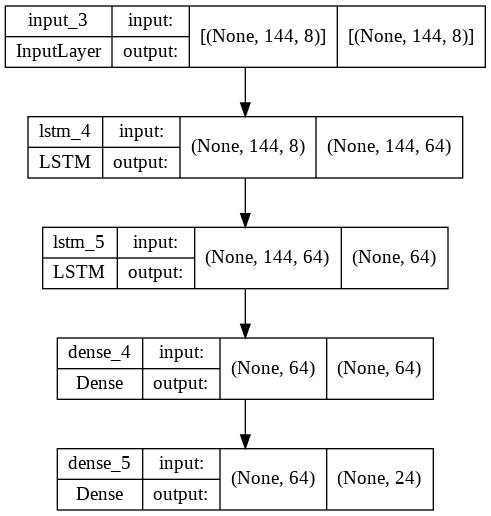

In [135]:
tf.keras.utils.plot_model(model, to_file='./LSTM_{}.png'.format(model), show_shapes=True, show_layer_names=True)

In [136]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
opt = keras.optimizers.Adam(learning_rate=0.01)
# tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
model.compile(loss=Huber(), optimizer=opt, metrics=['mse'])

In [137]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [138]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val), 
                    epochs=100, 
                    batch_size=24,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 0.0154 - mse: 0.0309
Epoch 1: val_loss improved from inf to 0.00276, saving model to tmp/ckeckpointer.ckpt
22/22 [==============================] - 11s 68ms/step - loss: 0.0154 - mse: 0.0309 - val_loss: 0.0028 - val_mse: 0.0055
Epoch 2/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0035 - mse: 0.0070
Epoch 2: val_loss did not improve from 0.00276
22/22 [==============================] - 0s 18ms/step - loss: 0.0035 - mse: 0.0069 - val_loss: 0.0029 - val_mse: 0.0058
Epoch 3/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0067
Epoch 3: val_loss did not improve from 0.00276
22/22 [==============================] - 0s 19ms/step - loss: 0.0033 - mse: 0.0067 - val_loss: 0.0031 - val_mse: 0.0062
Epoch 4/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0066
Epoch 4: val_loss improved from 0.00276 to 0.00276, saving model to tmp/ckeckpointer.ckpt
22/22 [==

In [139]:
# test_data를 활용하여 예측을 진행합니다.

pred = model.predict(x_test)

pred.shape

(175, 24)

In [140]:
x_test.shape,y_test.shape

(TensorShape([175, 144, 8]), TensorShape([175, 24]))

평가

In [141]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.0019 - mse: 0.0037


[0.001866311184130609, 0.003732622368261218]

In [142]:
pred[0].shape,y_test[0].shape

((24,), TensorShape([24]))

In [143]:
y_test_T=np.transpose(y_test)

In [154]:
y_test.shape

TensorShape([175, 24])

첫번째 예측 24시간에 대한 시각화

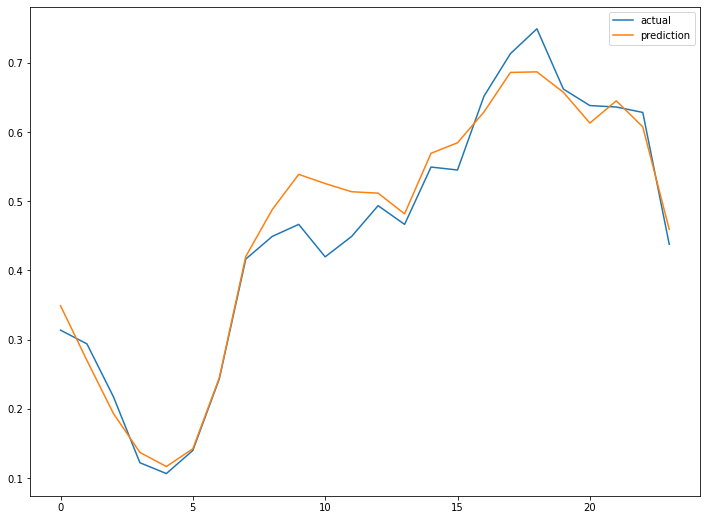

In [151]:
print('강남대로(신사역)-유입')

plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test[0]), label='actual')
plt.plot(pred[0], label='prediction')
plt.legend()

#LSTM-Attention

In [ ]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from attention import Attention

In [ ]:
tf.random.set_seed(42)
input=Input(shape=(x_train.shape[1],x_train.shape[-1]))
lstm_1= LSTM(32,return_sequences=True)(input)
lstm_2= LSTM(64,return_sequences=True)(lstm_1)
att_out = Attention()(lstm_2)
dense_1 = Dense(32, activation="relu")(att_out)
output = Dense(3)(dense_1)
model_2= Model(input,output)

In [ ]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 144, 3)]          0         
                                                                 
 lstm_10 (LSTM)              (None, 144, 32)           4608      
                                                                 
 lstm_11 (LSTM)              (None, 144, 64)           24832     
                                                                 
 attention_2 (Attention)     (None, 128)               20480     
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 54,147
Trainable params: 54,147
Non-trainable

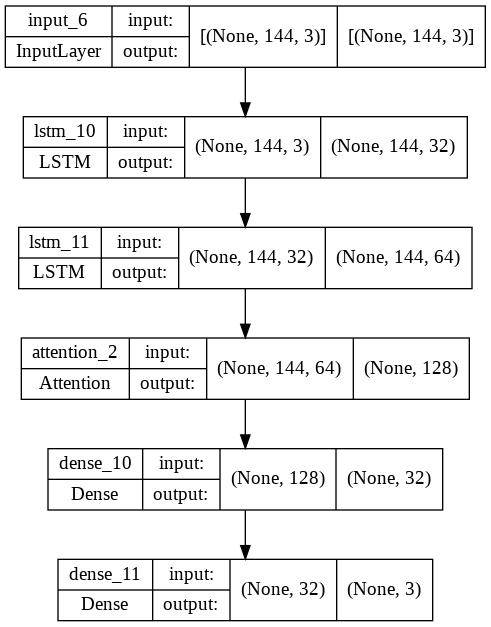

In [ ]:
tf.keras.utils.plot_model(model_2, to_file='./LSTM_Attention_{}.png'.format(model_2), show_shapes=True, show_layer_names=True)

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
opt = keras.optimizers.Adam(learning_rate=0.01)
model_2.compile(loss=Huber(), optimizer=opt, metrics=['mse'])

In [ ]:
history_2 = model_2.fit(x_train,y_train, 
                    validation_data=(x_val,y_val), 
                    epochs=20, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/20
394/395 [============================>.] - ETA: 0s - loss: 0.0426 - mse: 0.1549
Epoch 1: val_loss did not improve from 0.00390
395/395 [==============================] - 11s 21ms/step - loss: 0.0426 - mse: 0.1549 - val_loss: 0.0169 - val_mse: 0.0832
Epoch 2/20
394/395 [============================>.] - ETA: 0s - loss: 0.0189 - mse: 0.0847
Epoch 2: val_loss did not improve from 0.00390
395/395 [==============================] - 7s 17ms/step - loss: 0.0189 - mse: 0.0847 - val_loss: 0.0190 - val_mse: 0.0826
Epoch 3/20
393/395 [============================>.] - ETA: 0s - loss: 0.0179 - mse: 0.0798
Epoch 3: val_loss did not improve from 0.00390
395/395 [==============================] - 6s 16ms/step - loss: 0.0179 - mse: 0.0795 - val_loss: 0.0162 - val_mse: 0.0789
Epoch 4/20
393/395 [============================>.] - ETA: 0s - loss: 0.0165 - mse: 0.0724
Epoch 4: val_loss did not improve from 0.00390
395/395 [==============================] - 6s 16ms/step - loss: 0.0165 - mse: 0.0

#LSTM / LSTM-Attention 성능 비교

model : lstm / model_2 : lstm with attention

In [ ]:
model.evaluate(x_test,y_test),model_2.evaluate(x_test,y_test)

132/132 [==============================] - 1s 7ms/step - loss: 0.0013 - mse: 0.0027


([0.004850375931710005, 0.012031527236104012],
 [0.0013494720915332437, 0.0026989441830664873])

In [ ]:
pred_2 = model_2.predict(x_test)

In [ ]:
pred_2

array([[0.69054806, 0.7410023 , 0.93575984],
       [0.6736736 , 0.7056855 , 0.95536846],
       [0.57050836, 0.5938237 , 0.9582869 ],
       ...,
       [0.6041919 , 0.63985   , 0.9782172 ],
       [0.5976732 , 0.6153244 , 0.98011506],
       [0.5555799 , 0.5725506 , 0.9815479 ]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.65019552, 0.83973758, 1.        ])>

In [ ]:
y_test_T[0].shape

(4205,)

In [ ]:
y_test_T[0]

array([0.65019552, 0.62886598, 0.67010309, ..., 0.66939211, 0.64059723,
       0.49555635])

In [ ]:
y_test_T[1].shape

(4205,)

In [ ]:
y_test_T[1]

array([0.83973758, 0.67994377, 0.67525773, ..., 0.68181818, 0.65229616,
       0.52764761])

In [ ]:
y_test_T[2][220:240]

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4.])

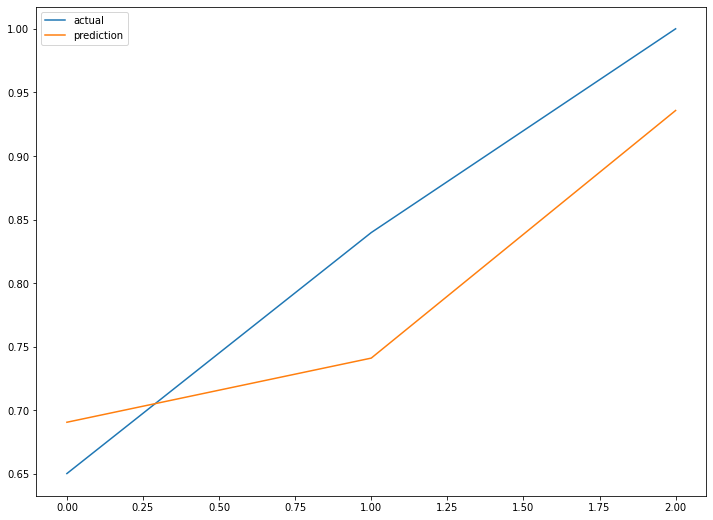

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test[0]), label='actual')
plt.plot(pred_2[0], label='prediction')
plt.legend()

강남대로(신사역)-유입


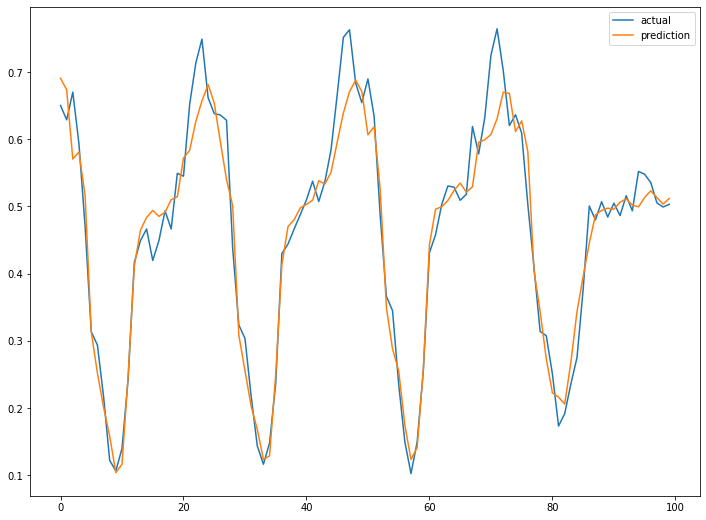

In [ ]:
print('강남대로(신사역)-유입')

plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test_T[0][:100]), label='actual')
plt.plot(pred_2.T[0][:100], label='prediction')
plt.legend()

강남대로(신사역)-유출


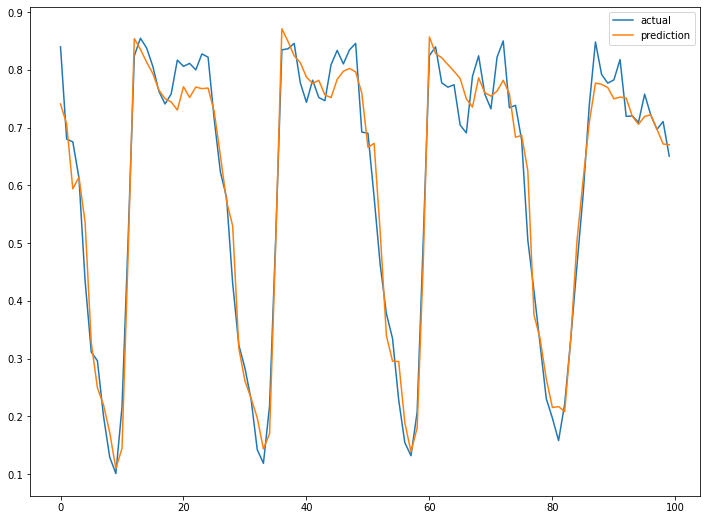

In [ ]:
print('강남대로(신사역)-유출')

plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test_T[1][:100]), label='actual')
plt.plot(pred_2.T[1][:100], label='prediction')
plt.legend()